## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Exploratory Data Analysis (EDA)

### Univariate

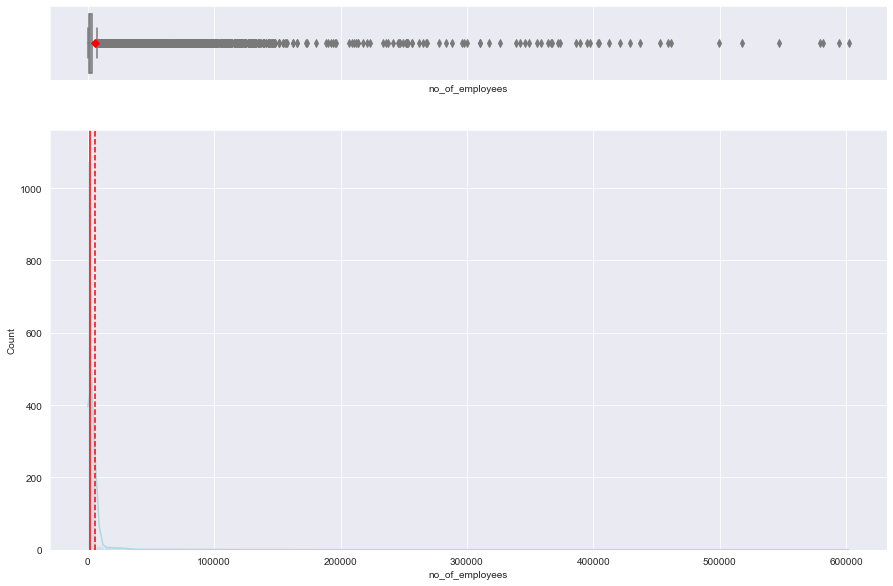

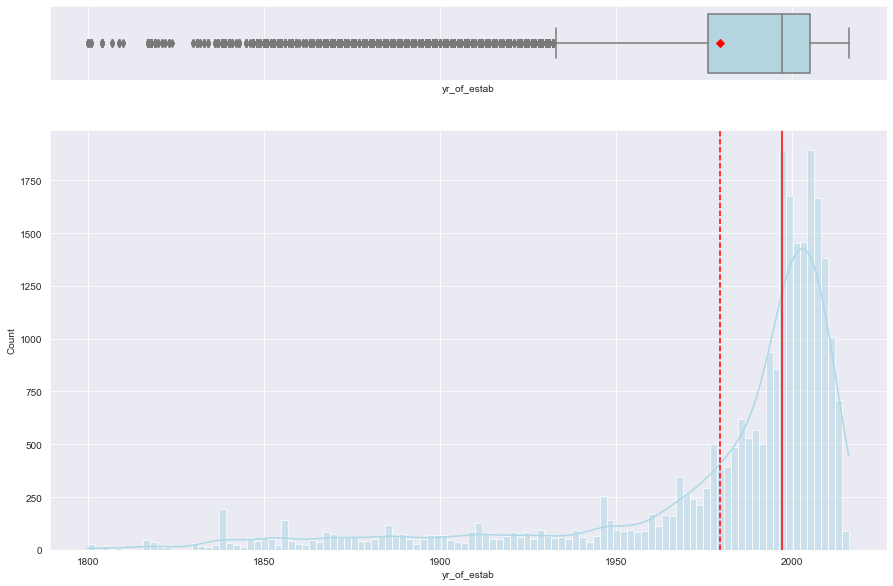

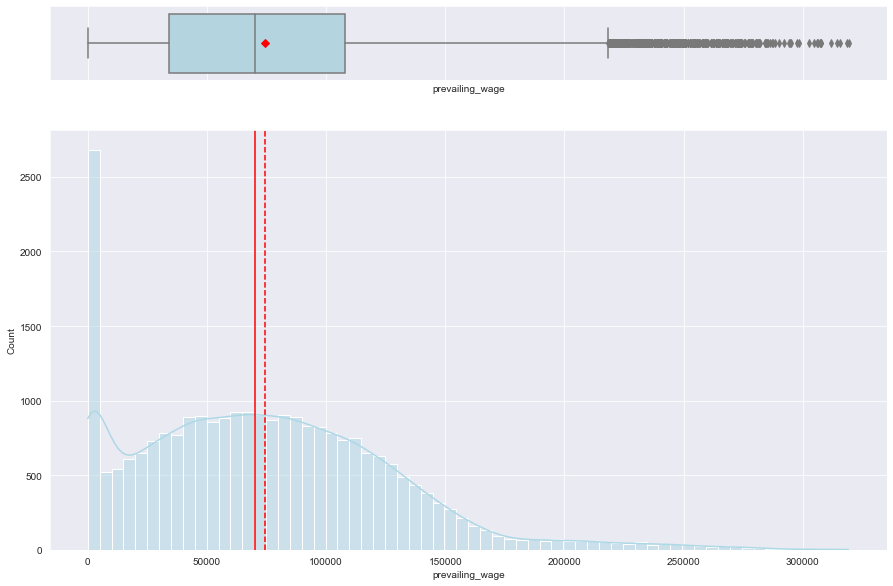

In [25]:
for i in num_columns:
    histogram_boxplot(df, i, kde=True)

#### Observations:

`no_of_employees`
- The distribution is heavily right-skewed having many and also large outliers.

`yr_of_estab`
- Similarly, the distribution is heavily left-skewed. A lot of outliers but represents as long established companies.
- It is nice to see the growing of economy especially when we are entering the Millenials generation.

`prevailing_wage`
- The distribution is heavily right-skewed having many and large outliers.
- There is also a spike around 0, we first verify this problem.

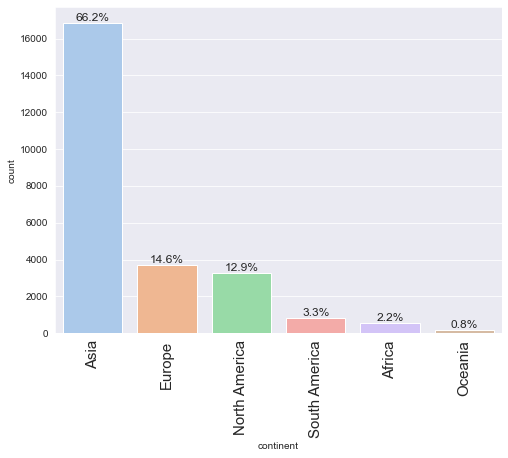

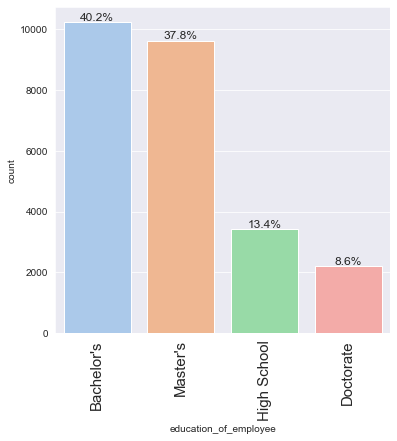

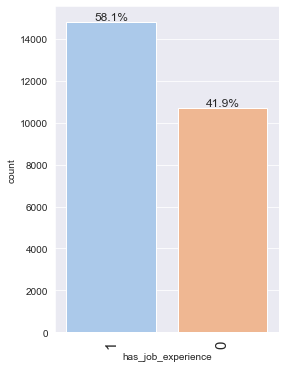

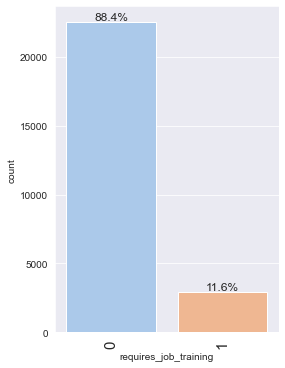

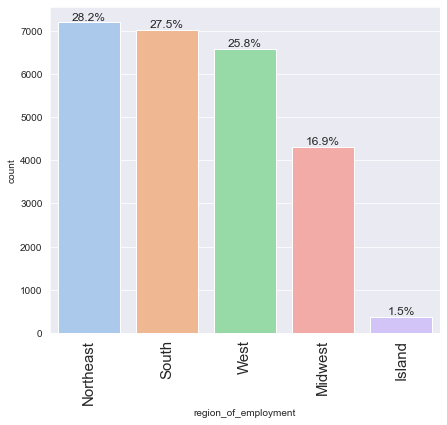

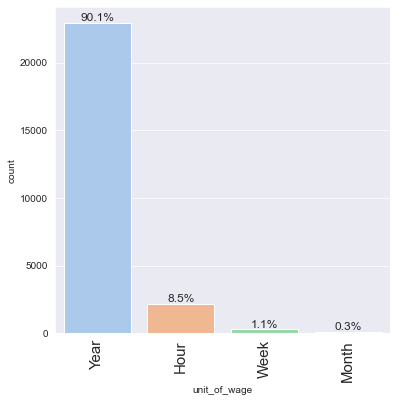

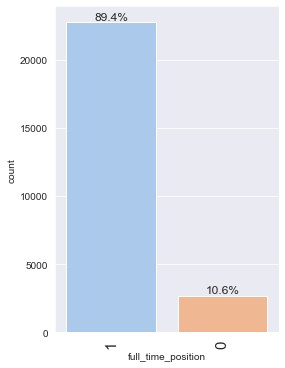

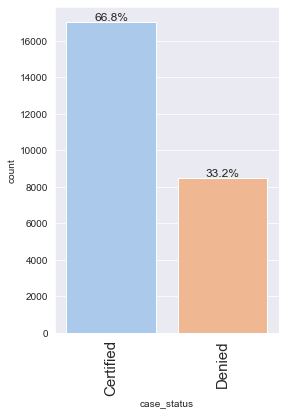

In [38]:
for i in cat_columns:
    labeled_barplot(df, i, perc=True, n=None)

#### Observations:

`continent`
- As large as 66.2% of employee are Asians. Followed by Europe and then North America. While only 0.8% are from Oceania.

`education_of_employee`
- 40.2% has bachelor degree and 37.8% has master degree. More than 78% of the employees are graduates.
- 13.4% are finished uptil high school.

`has_job_experience`
- 58.1% of employees has job experience.

`requires_job_training`
- But counterintuitively from the fact that 41.9% has no job experience, 88.4% of employees doesn't require job training.

`region_of_employment`
- There are almost similar preference employees intend to work in Northeast, South and West regions. Island has the least intention of employment.

`unit_of_wage`
- 90.1% of the prevailing wage is paid yearly.

`full_time_position`
- 89.4% are full-time positions.

`case_status`
- 66.8% of employees were certified, showing a slight class imbalance.

### Bivariate

**Correlation check**

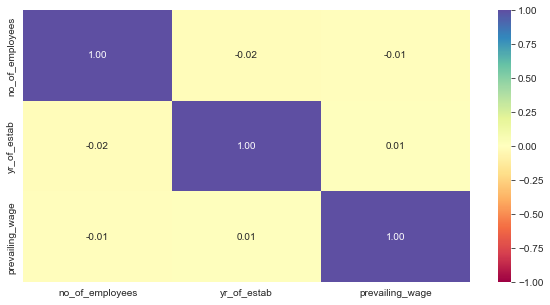

In [39]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) ## Complete the code to find the correlation between the variables
plt.show()

- No significant correlations can be seen between our numerical columns.

**We now study relationship with our target variable `case_status`**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


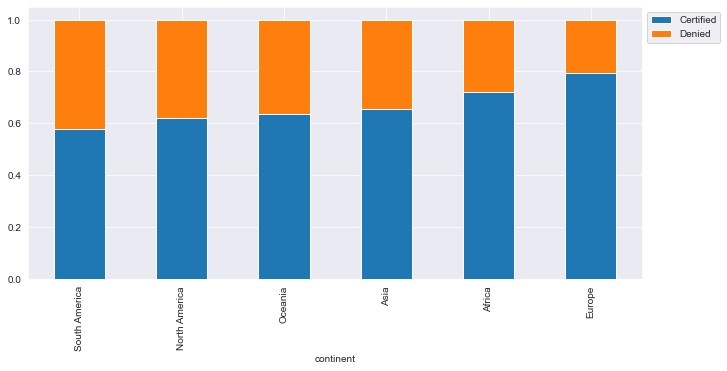

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


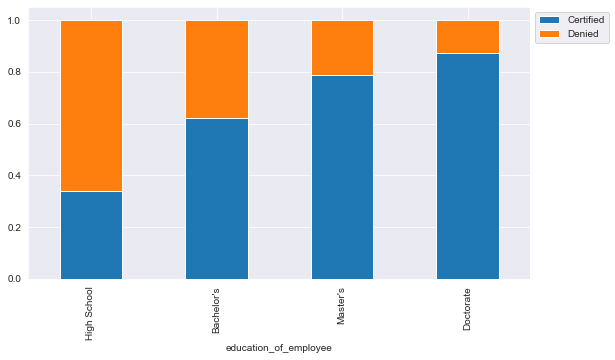

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
0                        5994    4684  10678
1                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


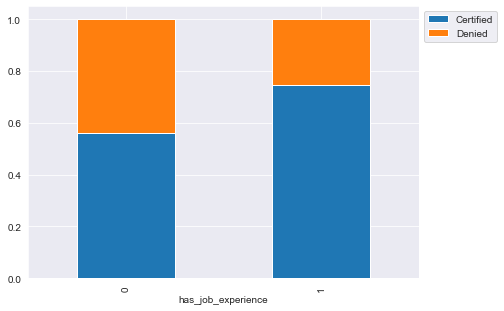

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
0                          15012    7513  22525
1                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


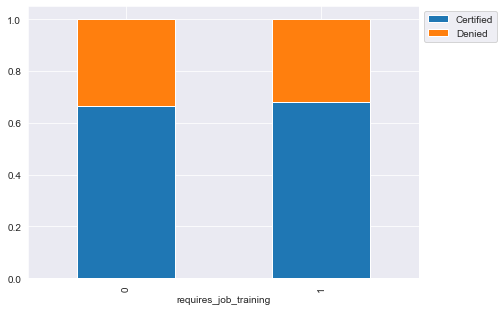

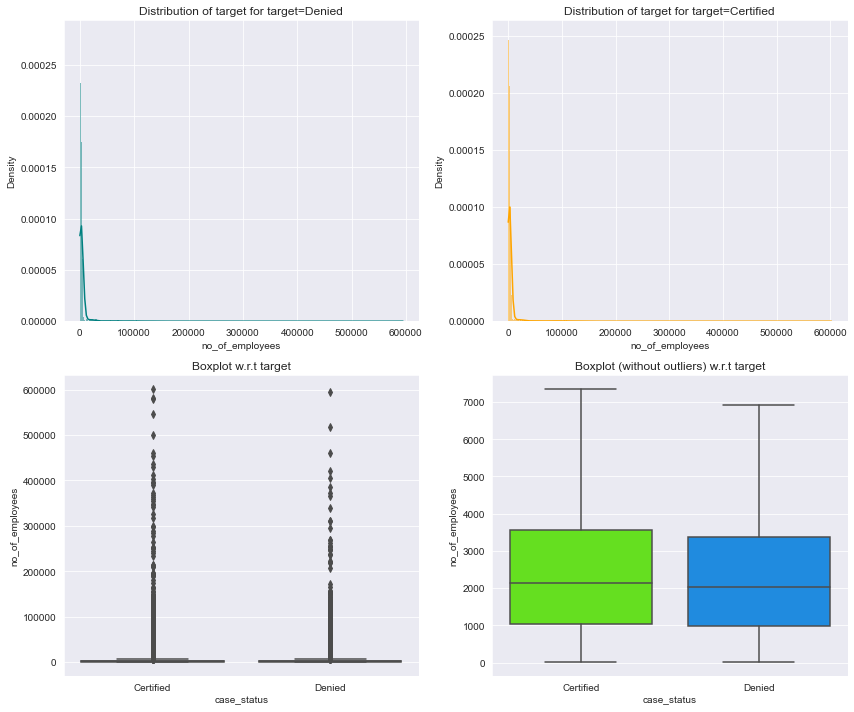

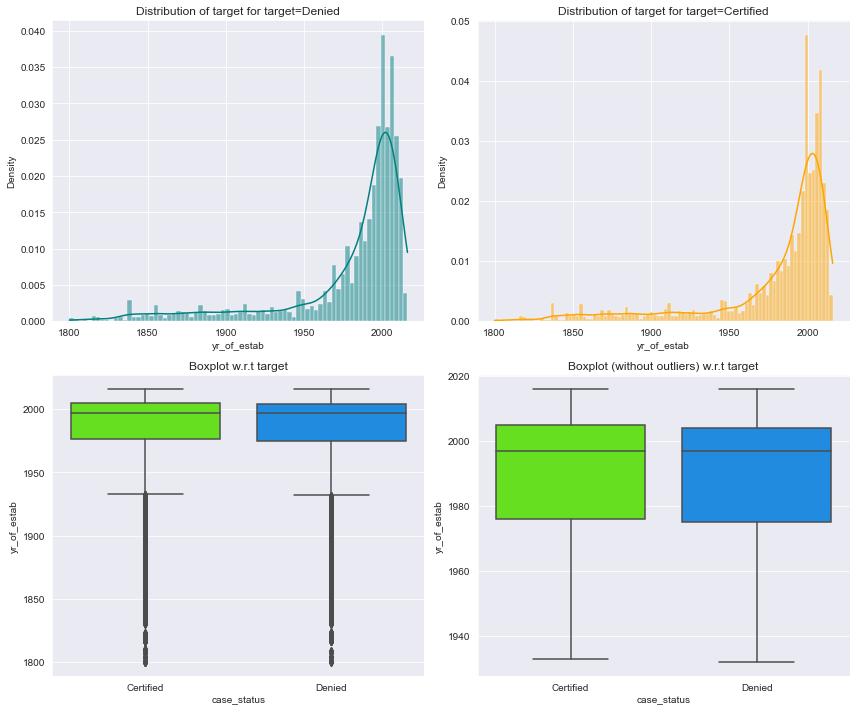

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


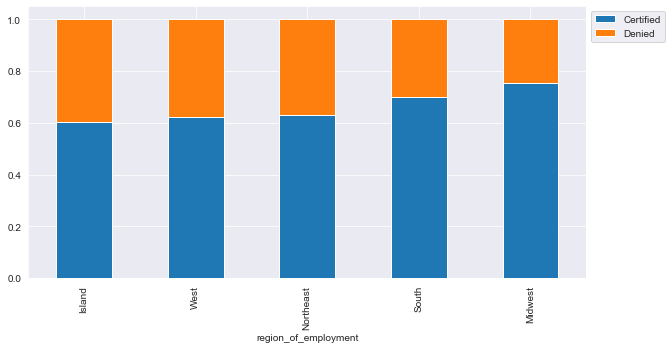

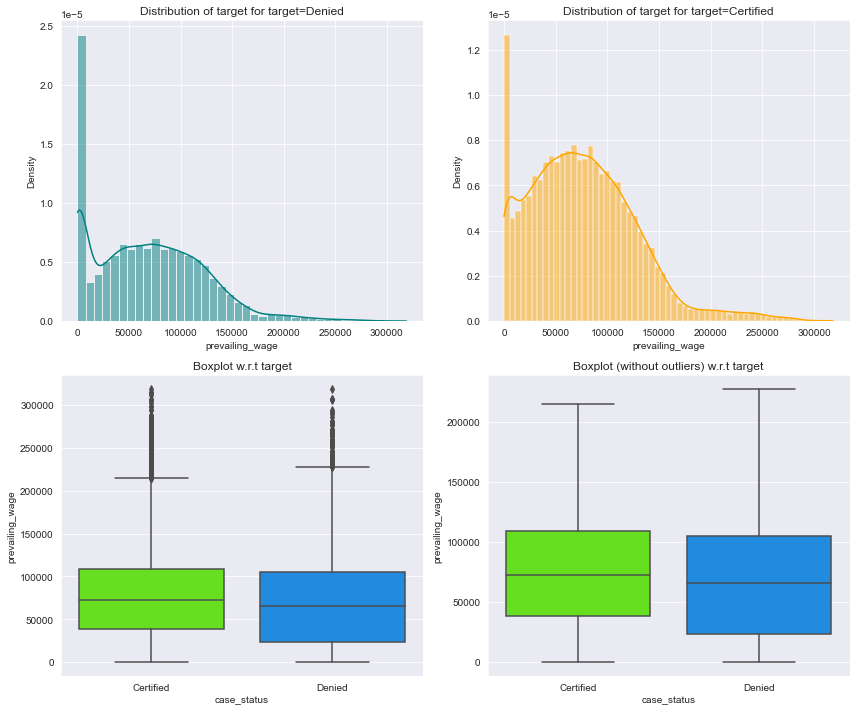

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


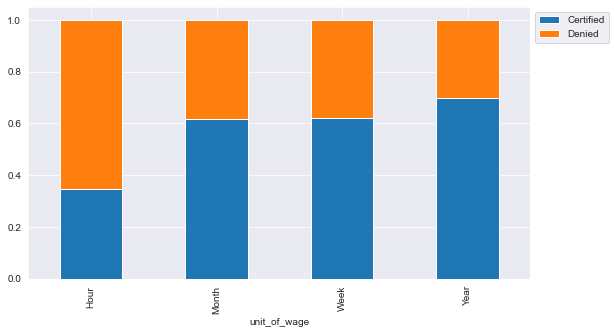

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
1                       15163    7610  22773
0                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


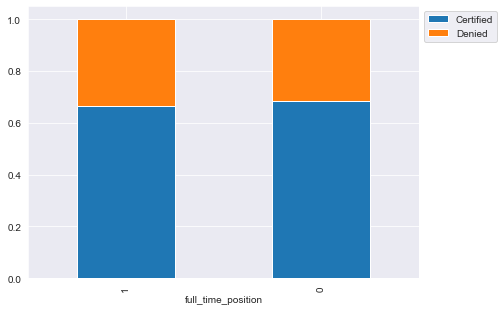

In [40]:
## continent vs case_status
stacked_barplot(df, "continent", "case_status")

#----------------------------------------------------------------------------------------------
## education_of_employee vs case_status
stacked_barplot(df, "education_of_employee", "case_status")

#----------------------------------------------------------------------------------------------
## has_job_experience vs case_status
stacked_barplot(df, "has_job_experience", "case_status")

#----------------------------------------------------------------------------------------------
## requires_job_training vs case_status
stacked_barplot(df, "requires_job_training", "case_status")

#----------------------------------------------------------------------------------------------
## no_of_employees vs case_status
distribution_plot_wrt_target(df, "no_of_employees", "case_status")

#----------------------------------------------------------------------------------------------
## yr_of_estab vs case_status
distribution_plot_wrt_target(df, "yr_of_estab", "case_status")

#----------------------------------------------------------------------------------------------
## region_of_employment vs case_status
stacked_barplot(df, "region_of_employment", "case_status")

#----------------------------------------------------------------------------------------------
## prevailing_wage vs case_status
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

#----------------------------------------------------------------------------------------------
## unit_of_wage vs case_status
stacked_barplot(df, "unit_of_wage", "case_status")

#----------------------------------------------------------------------------------------------
## full_time_position vs case_status
stacked_barplot(df, "full_time_position", "case_status")


#### Observations:

`continent` vs `case_status`
- (2) Europeans most likely be certified a visa compared to other continents, followed by Africa. While South Americans most likely has visa to be denied compared to other continents. Not much difference can be seen between North America, Oceania and Asia, around 36% chance of getting certified.
- (2) Overally, around a probability of 66.8% the U.S. will certified a visa to foreigners.

`education_of_employee` vs `case_status`
- (1) We can see that doctorates are very likely to be certified a visa, 87.2%. Followed by masters 78.6% and then bachelors 62.2%. High schoolers has considerably low probability (34%) of getting a visa.

`has_job_experience` vs `case_status`
- (3) It is apparent that employees with work experience has higher chance to be certified a visa.

`requires_job_training` vs `case_status`
- There isn't much difference in getting certified visa in terms of whether job training was required.

`no_of_employees` vs `case_status`
- There are many outliers, and a few large outliers, one company having more than 600000 employees.
- If without outliers, there is a slight indication that larger companies has more visa certified.

`yr_of_estab` vs `case_status`
- No particular difference can be seen.

`region_of_employment` vs `case_status`
- The midwest region of the U.S. is more likely to certify a visa. Followed by south region. No difference between island, west or northeast regions.

`prevailing_wage` vs `case_status`
- (5) It can be seen that higher prevailing average wage are more likely to get certified visa. 

`unit_of_wage` vs `case_status`
- (4) Yearly prevailing wage is most likely (~70%) to be certified for a visa. While hourly prevailing wage has the least chance of 34.6%. Not much difference between weekly and monthly.

`full_time_position` vs `case_status`
- No noticeable difference whether position applied is full-time or not for the chance of getting certified a visa.

### Multivariate

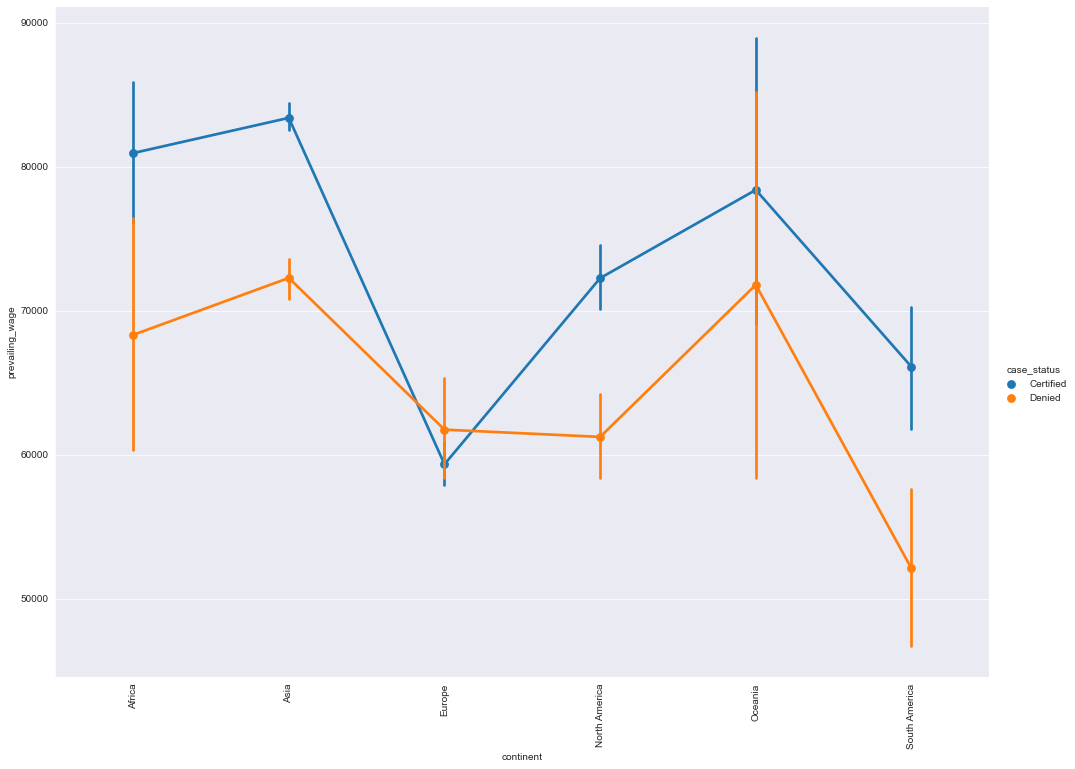

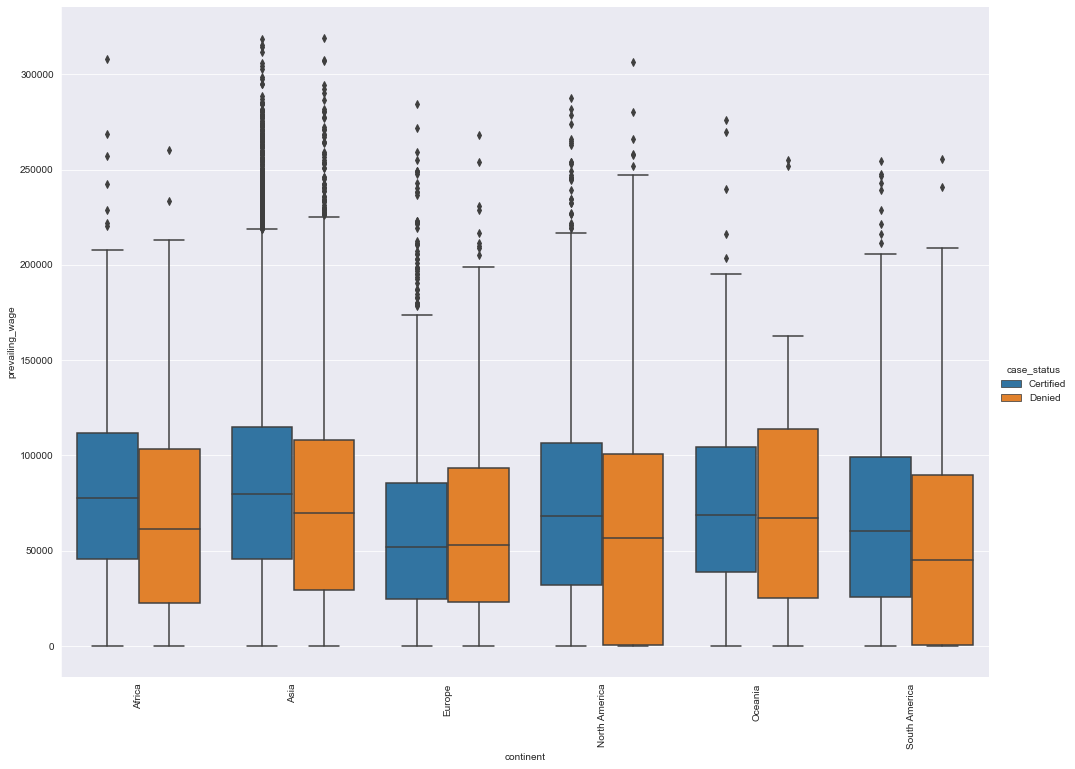

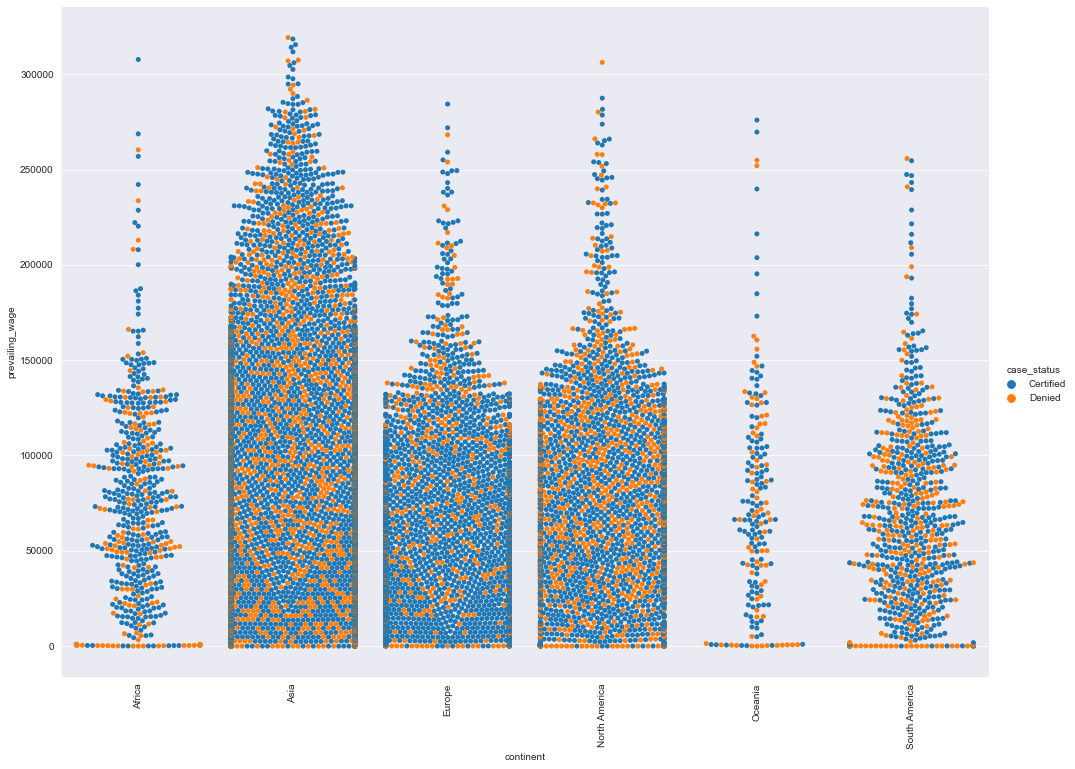

In [41]:
sns.catplot(data=df, kind='point', x="continent", y="prevailing_wage",hue='case_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

sns.catplot(data=df, kind='box', x="continent", y="prevailing_wage",hue='case_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

sns.catplot(data=df, kind='swarm', x="continent", y="prevailing_wage",hue='case_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

- (5) Apart from Europe, most continent, whose visa is certified, has higher average prevailing wage compared to those whose denied.
- (2) A slight clearly picture can be seen from this swarm plot compared to the stacked bar plot. Europeans and Africans has higher chances of getting certified. While South Americans has the least chances.

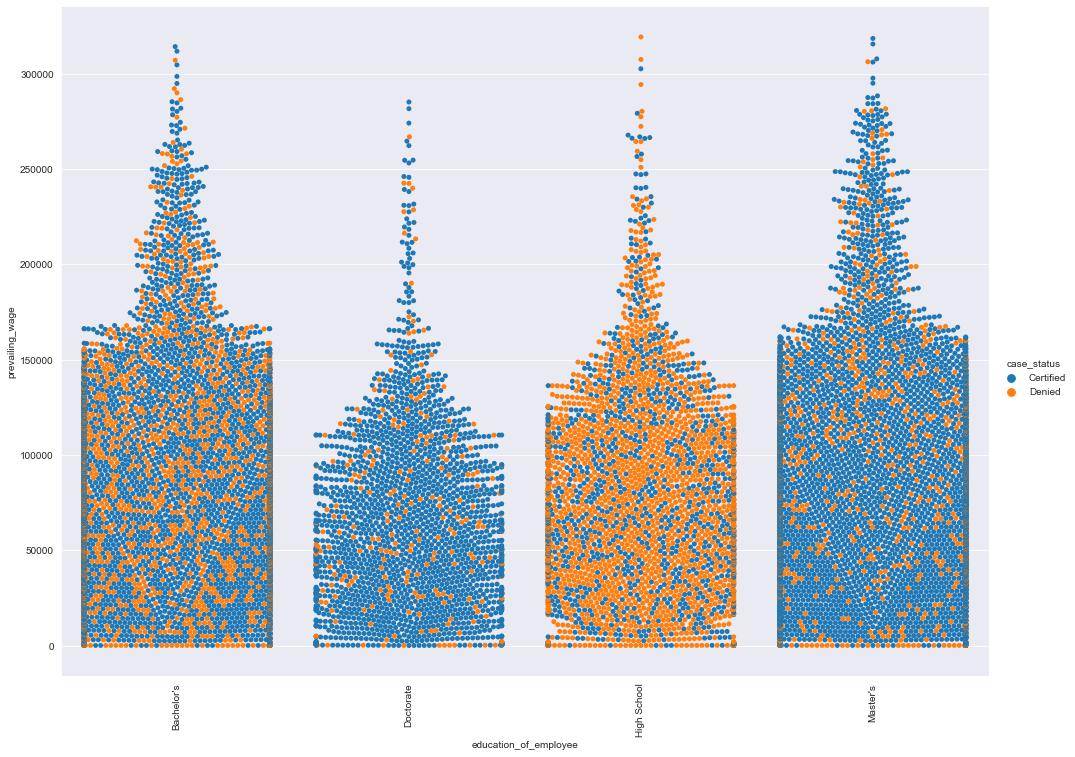

In [42]:
sns.catplot(data=df, kind='swarm', x="education_of_employee", y="prevailing_wage",hue='case_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

- (1) We can see distinctively and orderly manner on the difference of education level in  the chance of getting a visa.

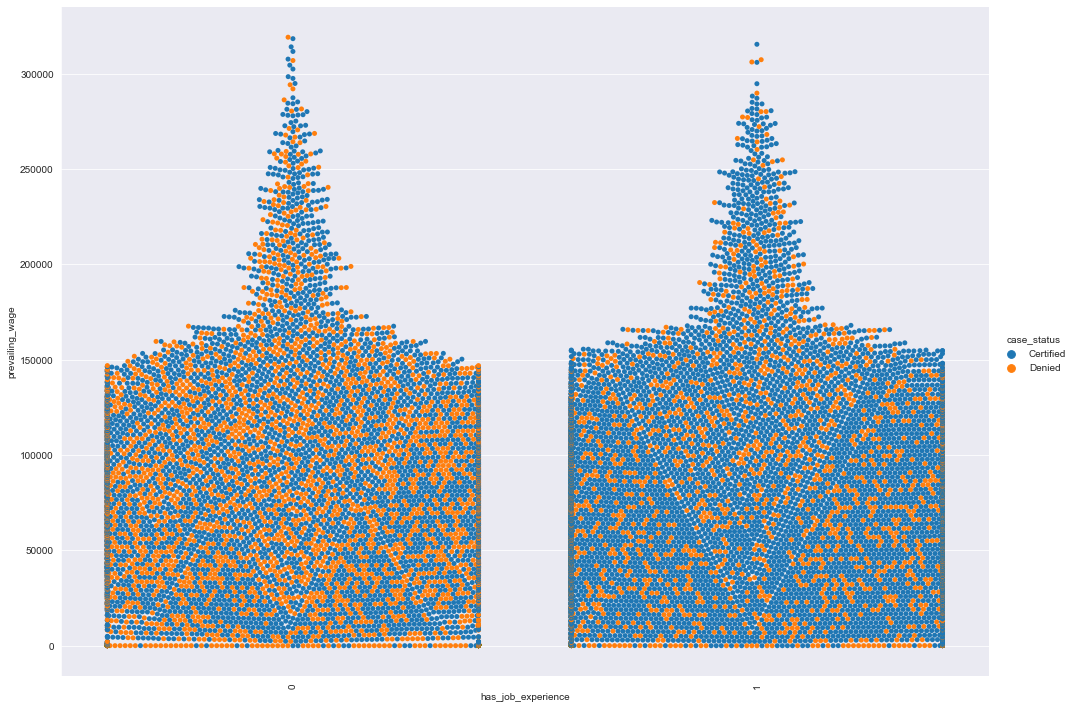

In [43]:
sns.catplot(data=df, kind='swarm', x="has_job_experience", y="prevailing_wage",hue='case_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

- (3) Again another better picture of experienced workers gets to have higher than of getting a visa.

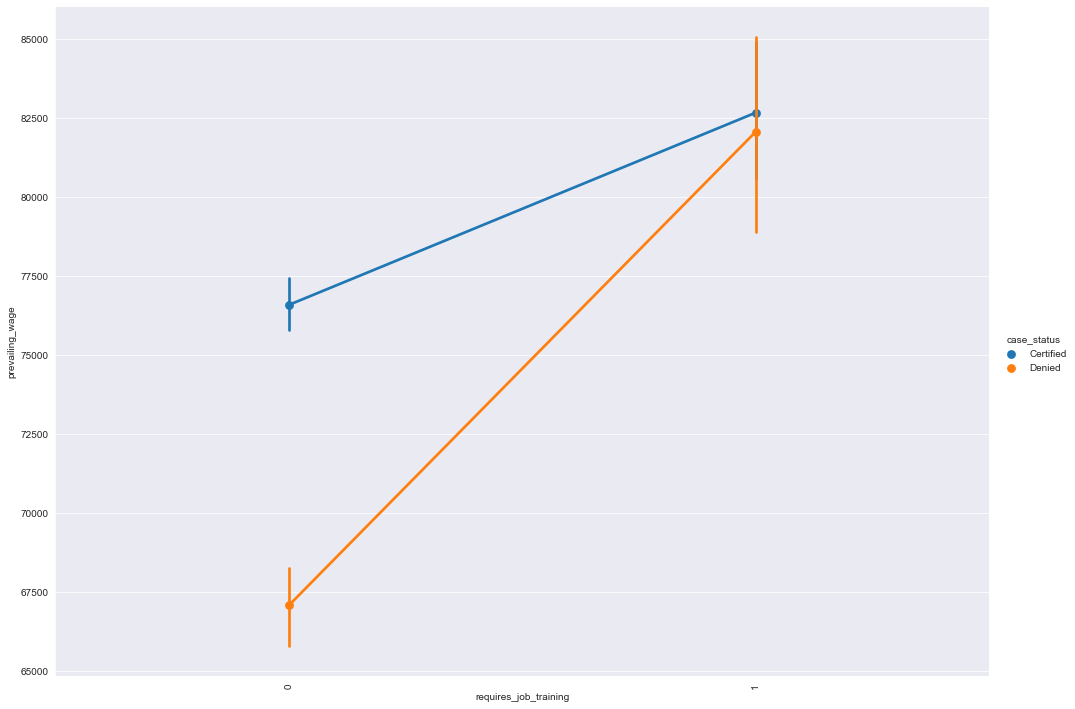

In [44]:
sns.catplot(data=df, kind='point', x="requires_job_training", y="prevailing_wage",hue='case_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

- We see that in both cases of visa status, high average prevailing wage, job training is required.

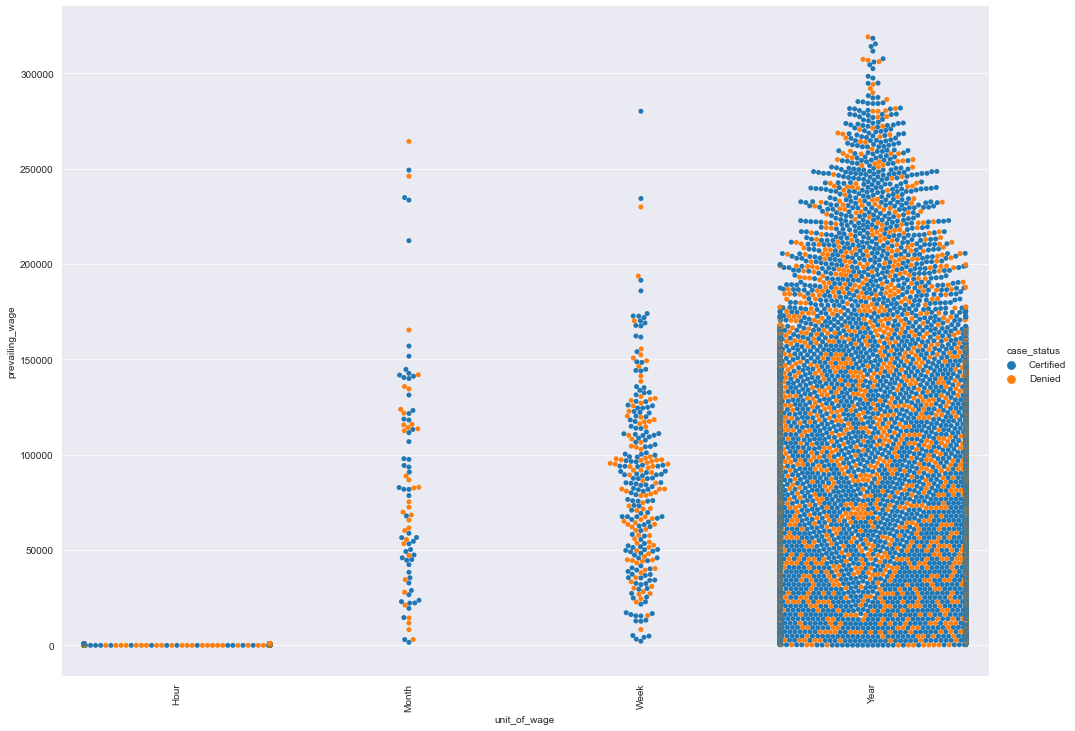

In [45]:
sns.catplot(data=df, kind='swarm', x="unit_of_wage", y="prevailing_wage",hue='case_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

- (4) Its easily seen that yearly unit is most likely to be certified for a visa.

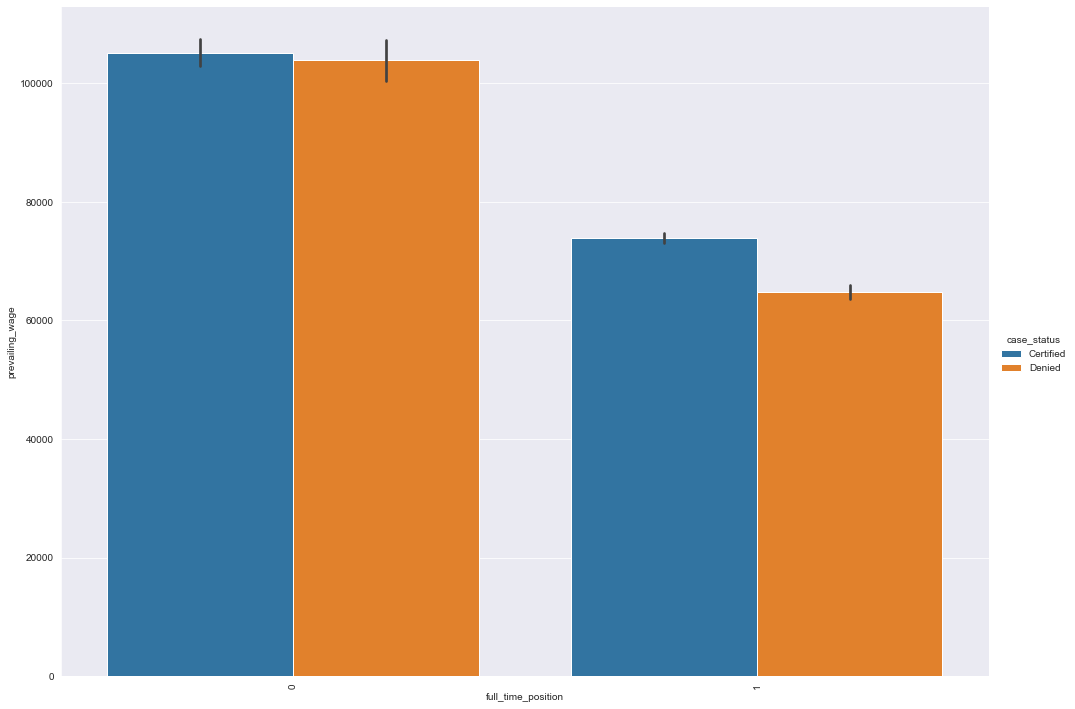

In [46]:
sns.catplot(data=df, kind='bar', x="full_time_position", y="prevailing_wage",hue='case_status',height=10, aspect=1.4)
plt.xticks(rotation=90)
plt.show()

- (5) Again there are more visa certified to those with higher average prevailing wage, regardless of whether the position is full-time or not. 
- We see that full-time position gives better chances of getting certified a visa, compared to non full-time position which has little difference between certify and deny.

- Here we will not treat the outliers as they are actual values.

#### Data Preparation

In [48]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [49]:
X = df.drop(["case_status"], axis=1)
Y = df["case_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1,stratify=Y
)

In [50]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


## Model evaluation

**Model evaluation criterion**


**Model can make wrong predictions as:**
- Predicting a visa should be certified but in reality, the visa should be denied (FP).
- Predicting a visa should be denied but in reality, the visa should be certified (FN).

**Which case is more important?**

- If we predict that a visa should be certified but in reality, the visa should be denied, then unsuitable employee will take away the opportunities from the capable ones.
- If we predict that a visa should be denied but in reality, the visa should be certified, then the U.S. is missing out actual talents.
- In this case both cases are important in our analysis.

**How to reduce the losses?**

OFLC would want *F1 score* to be maximized, greater the *F1 score* higher are the chances of minimizing the False Negatives and False Positives.

## Building bagging and boosting models

**Note we will be using class_weight parameter throughout all the bagging models to balance out the class**

### 1) Decistion Tree model

In [53]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.67,1:0.33},random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


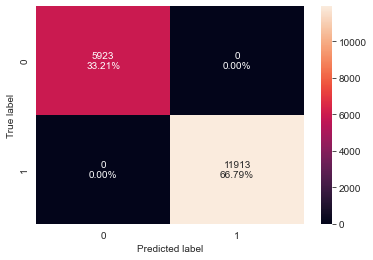

In [105]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

confusion_matrix_sklearn(dtree, X_train, y_train)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.653715  0.749265    0.73671  0.742935


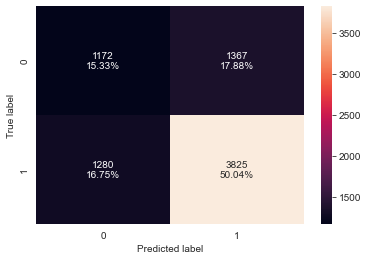

In [104]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

confusion_matrix_sklearn(dtree, X_test, y_test)

- The decision tree seems to show signs of overfitting in the training data, and it is not able to generalize well on the test data performance result.

#### Hypertuning decision tree model

In [58]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.67,1:0.33},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


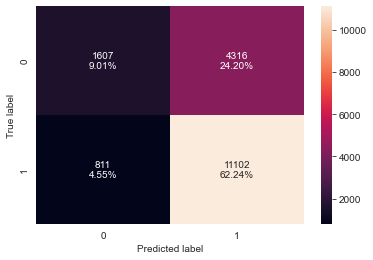

In [106]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

confusion_matrix_sklearn(dtree_estimator, X_train,y_train)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


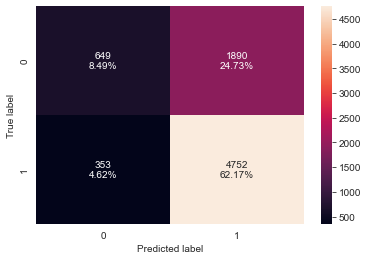

In [107]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

- Our hypertuned decision tree model is generalizing the test data very well! 
- We have a decent F1 score of 81%, and a precision of 72%, also a very high recall score of 93.1%

### 2) Bagging Classifier model

In [63]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.67,1:0.33},random_state=1),random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  random_state=1)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985479  0.987241   0.990984  0.989109


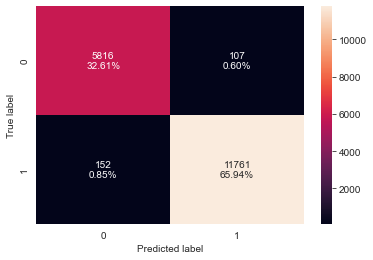

In [108]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

confusion_matrix_sklearn(bagging, X_train, y_train)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.695709  0.778844   0.768606  0.773691


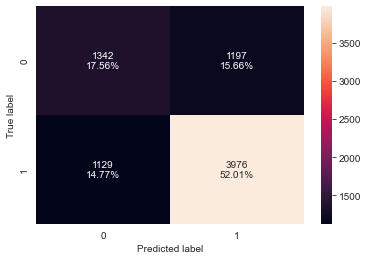

In [109]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

confusion_matrix_sklearn(bagging, X_test, y_test)

- The bagging classifier model also doesn't seem to perform well.

#### Hypertuning bagging classifier model

In [68]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.67,1:0.33},random_state=1)
param_grid = {'base_estimator':[cl1],
              'max_samples': [0.7,0.8,0.9,1], 
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'f1', cv = 5)
grid.fit(X_train, y_train)

## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  max_features=0.8, max_samples=0.7, n_estimators=101,
                  random_state=1)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.996692  0.999748    0.99532  0.997529


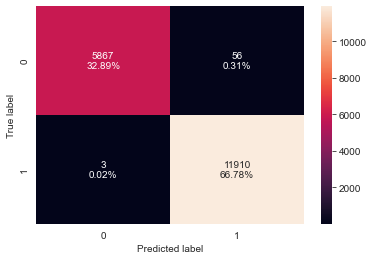

In [110]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

confusion_matrix_sklearn(bagging_estimator, X_train,y_train)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.724882  0.880901   0.750501  0.810489


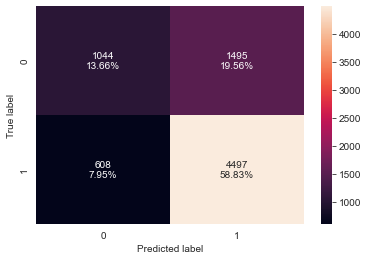

In [111]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

- The tuned bagging classifier model did improve better than before but it stills not generalizing the test data well in all the performance metric.

### 3) Random Forest model

In [73]:
rf = RandomForestClassifier(class_weight={0:0.67,1:0.33}, random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


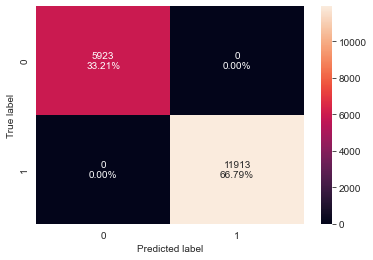

In [112]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

confusion_matrix_sklearn(rf,X_train,y_train)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.723182  0.842703   0.766162  0.802612


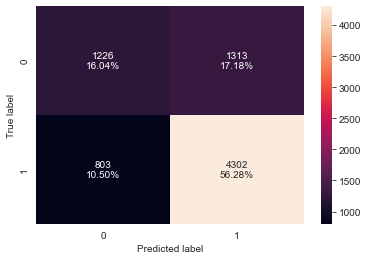

In [113]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

confusion_matrix_sklearn(rf,X_test,y_test)

- Our random forest model as well, it is still heavily overfitting our training data, giving a not well-generalized test data performance results.

#### Hypertuning random forest model

In [78]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(class_weight={0:0.67,1:0.33},random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='f1',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, max_features=0.9,
                       max_samples=0.7, n_estimators=501, random_state=1)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.99843  0.999916   0.997739  0.998826


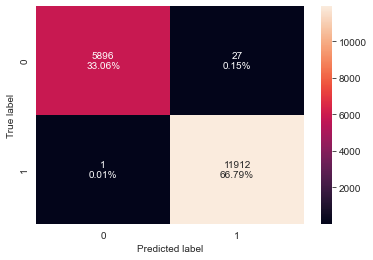

In [114]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

confusion_matrix_sklearn(rf_estimator, X_train,y_train)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.726321  0.856024   0.763052  0.806869


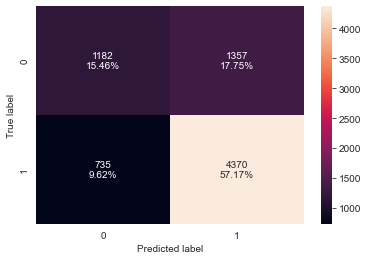

In [115]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

confusion_matrix_sklearn(rf_estimator, X_test,y_test)

- Tuning our random forest model didn't change the problem of overfitting. 

#### Summary

- All our default bagging models are overfitting the training data.
- However, our tuned decision tree model works well and providing decent F1 score. The rest of the tuned bagging models are overfitting and not well-generalizing the test data in terms of all the performance metrics.

### 4) AdaBoost model

   Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908
   Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


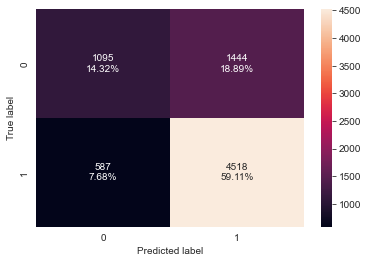

In [83]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

- Adaboost is giving a generalized performance. It has a higher F1 score of 81.6%.

#### Hypertuning adaboost

In [84]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.754317  0.889365   0.775679  0.828641
   Accuracy    Recall  Precision        F1
0   0.74045  0.881293   0.765527  0.819341


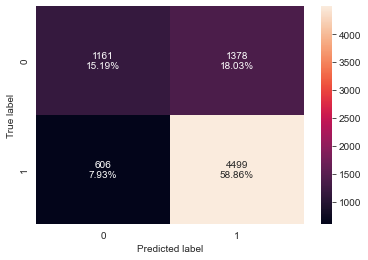

In [85]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

- Hypertuned Adaboost is also giving a generalized performance. It has a little bit better F1 score of 81.9%.

### 5) Gradient boost model

Training performance:
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


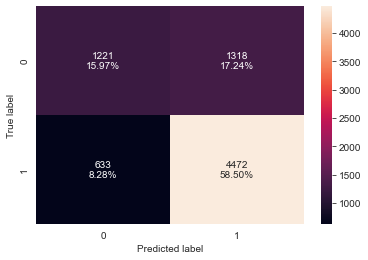

In [86]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

- Gradient boost model is giving a generalized performance. It has a F1 score of 82.1%.

#### Hypertuning gradient boost model

In [87]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=0.9)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.759027  0.882649   0.783824  0.830306
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744505  0.874045   0.773042  0.820447


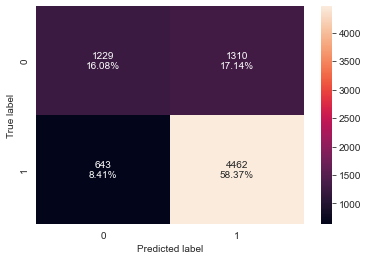

In [88]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

- Hypertuned Gradient boost model is also giving a generalized performance. It has a similar F1 score as the default, ~82%.

### 6) XGboost model

Training performance:
    Accuracy    Recall  Precision        F1
0  0.838753  0.931419   0.843482  0.885272
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.733255  0.860725   0.767913  0.811675


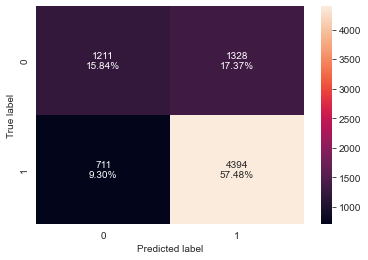

In [89]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

- XGboost model is somewhat giving a generalized performance. It has a F1 score of ~81.2%.

#### Hypertuning XGboost model

In [90]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "gamma":[0,1,3],
    "subsample":[0.5,0.7,0.9,1],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1],
    "scale_pos_weight":[0,1,2,5],
    "n_estimators": np.arange(10,100,20),
    "learning_rate":[0.01,0.1,0.2,0.05]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.760148  0.89927   0.776811  0.833567
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743066  0.888149   0.764974  0.821972


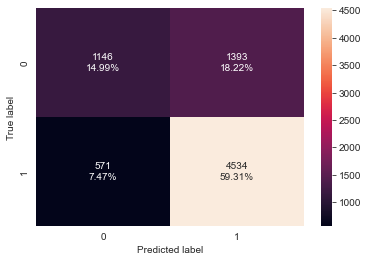

In [91]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

- Hypertuned XGboost model is now giving a well generalized performance. It has a higher F1 score of ~82.2%.

### 7) Stacking model

In [92]:
estimators = [('Random Forest',rf_estimator), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.67,
                                                                     1: 0.33},
                                                       max_features=0.9,
                                                       max_samples=0.7,
                                                       n_estimators=501,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weig...
    

Training performance:
    Accuracy   Recall  Precision        F1
0  0.843407  0.95123    0.83668  0.890286
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.737572  0.884231   0.761343  0.818198


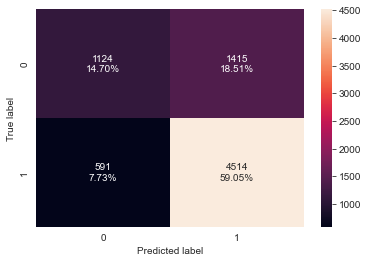

In [93]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

- Stacking model is giving a somewhat generalized performance. It has F1 score of 81.8%.

## Model Performance Comparison and Conclusions

In [94]:
# training performance comparison
models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_model_train_perf.T,rf_estimator_model_train_perf.T,
     bagging_model_train_perf.T,bagging_estimator_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]

# testing performance comparison
models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_model_test_perf.T,rf_estimator_model_test_perf.T,
     bagging_model_test_perf.T,bagging_estimator_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]

In [95]:
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,1.0,0.998430,0.985479,0.996692,0.738226,0.754317,0.758802,0.759027,0.838753,0.760148,0.843407
Recall,1.0,0.931923,1.0,0.999916,0.987241,0.999748,0.887182,0.889365,0.883740,0.882649,0.931419,0.899270,0.951230
Precision,1.0,0.720067,1.0,0.997739,0.990984,0.995320,0.760688,0.775679,0.783042,0.783824,0.843482,0.776811,0.836680
F1,1.0,0.812411,1.0,0.998826,0.989109,0.997529,0.819080,0.828641,0.830349,0.830306,0.885272,0.833567,0.890286


In [96]:
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.653715,0.706567,0.723182,0.726321,0.695709,0.724882,0.734301,0.740450,0.744767,0.744505,0.733255,0.743066,0.737572
Recall,0.749265,0.930852,0.842703,0.856024,0.778844,0.880901,0.885015,0.881293,0.876004,0.874045,0.860725,0.888149,0.884231
Precision,0.736710,0.715447,0.766162,0.763052,0.768606,0.750501,0.757799,0.765527,0.772366,0.773042,0.767913,0.764974,0.761343
F1,0.742935,0.809058,0.802612,0.806869,0.773691,0.810489,0.816481,0.819341,0.820927,0.820447,0.811675,0.821972,0.818198


- Most of the bagging models are overfitting the training data except for only our tuned decision tree model. It is well generalizing the test data and has a good F1 score of ~81%.
- While most of the boosting models are well generalizing the test data, no signs of overfitting except for 'borderline cases' which are XGboost model and Stacking model.
- Among all the boosting model, also compared to our tuned decision tree model, tuned XGBoost model gives the highest F1 score of ~82.2%.

**Tuned XGB model feature importance**

In [97]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.416987
has_job_experience_1               0.138347
education_of_employee_Master's     0.134909
education_of_employee_Doctorate    0.062481
continent_Europe                   0.049429
unit_of_wage_Year                  0.036509
region_of_employment_Midwest       0.025785
region_of_employment_South         0.017106
prevailing_wage                    0.016865
region_of_employment_West          0.014136
continent_North America            0.012572
continent_Asia                     0.011975
region_of_employment_Northeast     0.011842
full_time_position_1               0.011485
continent_South America            0.009594
requires_job_training_1            0.007722
continent_Oceania                  0.005551
yr_of_estab                        0.005402
no_of_employees                    0.004952
unit_of_wage_Week                  0.003204
unit_of_wage_Month                 0.003146


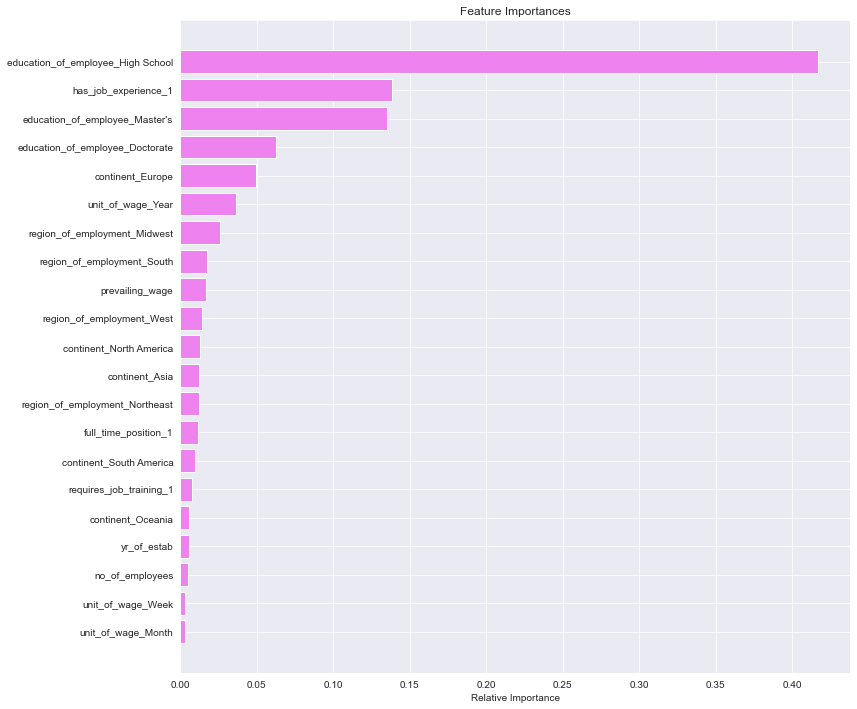

In [98]:
feature_names = X_train.columns
importances =xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The education of employee (namely: high schoolers, masters, and doctorates) seems to be the most important feature, especially emloyees with only a high school level of education. Followed by a master degree (3rd importance) and a doctorate degree (4th importance).
- The second most important feature is having job experience.
- Then the fifth important feature is employee originated from Europe.

## Actionable Insights and Recommendations

#### Insights from analysis above:
- Throughout the analysis we saw that education of employee seems to be the number one feature to emphasize at. 
- Work experience is the second most important feature.
- On which continent employee coming from also plays important role in getting a certified visa. This may be due to the nature of the passport.
- The frequency of the wage paid seems to favor for yearly income. This may make sense since larger companies tend to be capable of providing such salary in which visa applications is more common within such company.
- Regions of the employment also affects the chances of getting a visa.
- Then comes the prevailing wage, although it is always the matter of the fact but it is not more important than the above factors mentioned.


#### Recommendations (based on tuned XGBoost  model):
- Based on the insights and from our chosen model, XGBoost. The procedure to check in visa approvals shall be:
    1. education background
    2. work experience
    3. continent applying from
    4. salary unit (Hourly, Weekly, Monthly or Yearly)
    5. region of employment applied to
    6. estimated salary


- Criteria to certify a visa according to our XGBoost model should depend on these features (in an orderly manner):
    - Education background and work experience:
        - If the employee doesn't have any education background (especially high school) and has no work experience as well, then it is expected that there will be difficulties for such an employee to contribute in their employment. Hence too risky to certify a visa to whom who can't fully meet or exceed the wage paid.
    - Europeans, Yearly prevailing wage, midwest region of employment:
        - Employees that has the 2 above features (education and experience); and specifically on employees coming from Europe; applied in midwest region of the U.S. which provides yearly salary, should be our target talent.
    - Region of employment, prevailing wage:
        - Employees who applied to regions other than the Midwest or South may need to put more attention. For example, if the region applied is from the least populated areas but offers a high prevailing wage (also if most of the factors above satisfied) then this could be a possible candidate to be certified a visa.